In [206]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
complete_data = pd.merge(clinical_data, mouse_data, on='Mouse ID', how='left')

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [207]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
group = complete_data.groupby(['Drug', 'Timepoint'])
mean_volume = group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_volume = mean_volume.reset_index()

# Preview DataFrame
mean_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [208]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_volume = group['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_volume = sem_volume.reset_index()

# Preview DataFrame
sem_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [209]:
# Minor Data Munging to Re-Format the Data Frames
mean_volume = group['Tumor Volume (mm3)'].mean()
mean_volume = mean_volume.unstack(0)
sem_volume = group['Tumor Volume (mm3)'].sem()
sem_volume = sem_volume.unstack(0)

# Preview that Reformatting worked
mean_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


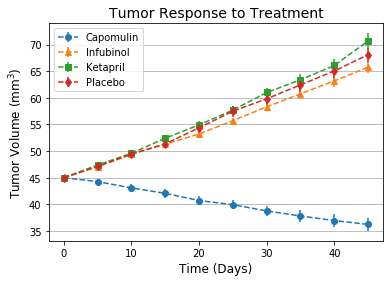

In [210]:
# Generate the Plot (with Error Bars)
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
marker = ('o', '^', 's', 'd')
for d, m in zip(drugs, marker):
    plt.errorbar(
        mean_volume.index,
        mean_volume[d],
        sem_volume[d],
        marker=m, label=d, ls='--')
plt.legend()
plt.grid(axis='y')
plt.xlabel('Time (Days)', size=12)
plt.ylabel(r'Tumor Volume (mm$^3$)', size=12)
plt.title('Tumor Response to Treatment', size=14)

# Save the Figure
plt.savefig('treatment.png')

## Metastatic Response to Treatment

In [211]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
group = complete_data.groupby(['Drug', 'Timepoint'])
meta_site = group['Metastatic Sites'].mean()

# Convert to DataFrame
meta_site = pd.DataFrame(meta_site)

# Preview DataFrame
meta_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [212]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta = group['Metastatic Sites'].sem()

# Convert to DataFrame
sem_meta = pd.DataFrame(sem_meta)

# Preview DataFrame
sem_meta.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [213]:
# Minor Data Munging to Re-Format the Data Frames
meta_site = meta_site.unstack(0)
meta_site.columns = [y for (x, y) in meta_site.columns]
meta_site.columns.name = 'Drug'
sem_meta = sem_meta.unstack(0)
sem_meta.columns = [y for (x, y) in sem_meta.columns]

# Preview that Reformatting worked
meta_site.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


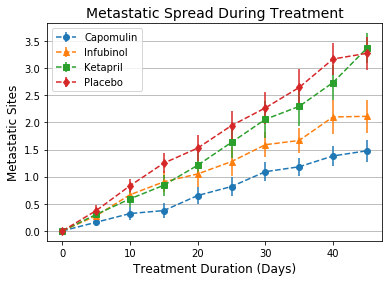

In [222]:
# Generate the Plot (with Error Bars)
for d, m in zip(drugs, marker):
    plt.errorbar(
        meta_site.index,
        meta_site[d],
        sem_meta[d],
        marker=m, label=d, ls='--')
plt.legend()
plt.grid(axis='y')
plt.xlabel('Treatment Duration (Days)', size=12)
plt.ylabel('Metastatic Sites', size=12)
plt.title('Metastatic Spread During Treatment', size=14)

# Save the Figure
plt.savefig('spread.png')

## Survival Rates

In [231]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = group['Mouse ID'].count()

# Convert to DataFrame
mouse_count =mouse_count.reset_index()
mouse_count = mouse_count.rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [239]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = group['Mouse ID'].count()
mouse_count = mouse_count.unstack(0)

# Preview the Data Frame
mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


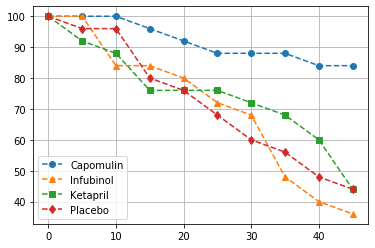

In [242]:
# Generate the Plot (Accounting for percentages)
for d, m in zip(drugs, marker):
    plt.plot(
        mouse_count.index,
        100 * mouse_count[d] / mouse_count[d][0],
        marker=m, label=d, ls='--')
plt.legend()
plt.grid()

# Save the Figure


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [218]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [219]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)